<h1>Data Analysis and Visualization Home Assignment</h1>
<h1> Mengxue Tang (mt3478)</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lat,lon) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


In [102]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import datetime

<h2>Read the data</h2>


In [86]:
#Add necessary imports and functions to read the data
df = pd.read_csv('yellow_tripdata_small_2016-01.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Remove data outside the bounding box</h2>


In [87]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
df = df[(df['pickup_longitude']>westlimit) & (df['pickup_longitude']<eastlimit)]
df=df[(df['dropoff_longitude']>westlimit) & (df['dropoff_longitude']<eastlimit)]
df=df[(df['pickup_latitude']>southlimit) & (df['pickup_latitude']<northlimit)]
df=df[(df['dropoff_latitude']>southlimit) & (df['dropoff_latitude']<northlimit)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [88]:
df['tpep_dropoff_datetime'] = [dt.strptime(x, "%Y-%m-%d %H:%M:%S") for x in df['tpep_dropoff_datetime']]
df['tpep_pickup_datetime']=[dt.strptime(y, "%Y-%m-%d %H:%M:%S") for y in df['tpep_pickup_datetime']]
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,0 days 00:10:57
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,0 days 00:06:05
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,0 days 00:08:22
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,0 days 00:03:14
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,0 days 00:22:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,0 days 00:12:23
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,0 days 00:03:58
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,0 days 00:08:02
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,0 days 00:22:06


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [89]:
df['duration']=df['duration'].dt.total_seconds()
df['duration']

0           657.0
1           365.0
2           502.0
3           194.0
4          1351.0
            ...  
1090681     743.0
1090682     238.0
1090683     482.0
1090684    1326.0
1090685    1160.0
Name: duration, Length: 1070406, dtype: float64

<h2>Remove data where duration is greater than 10000 seconds</h2>

In [90]:
df = df[df['duration']<=10000]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0


<h2>Plot duration and compare with a gamma distribution</h2>

/Users/daizytang/Documents/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

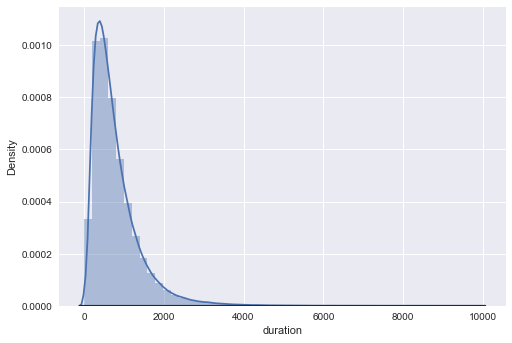

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
#sns.kdeplot(df['duration'], shade=True)
sns.distplot(df['duration'], kde=True, fit=stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

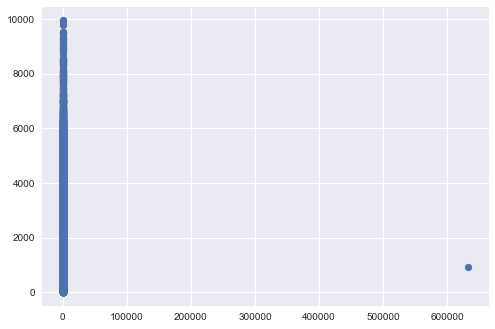

In [92]:
plt.scatter(df['trip_distance'],df['duration'])


In [93]:
i=df[df['trip_distance']==max(df['trip_distance'])].index
#max(df['trip_distance'])
df.loc[i]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
234845,1,2016-01-04 17:12:01,2016-01-04 17:27:36,1,633008.3,-73.99115,40.739609,1,N,-73.992462,40.713997,2,2.5,1.0,0.5,0.0,0.0,0.3,4.3,935.0


We could assume that this data may have some problems, it's unrealistic to have such a long trip-distance here. Thus we delete this row.

In [94]:
df=df.drop(index=i)


Text(0.5, 1.0, 'scatter plot between trip_distance and duration')

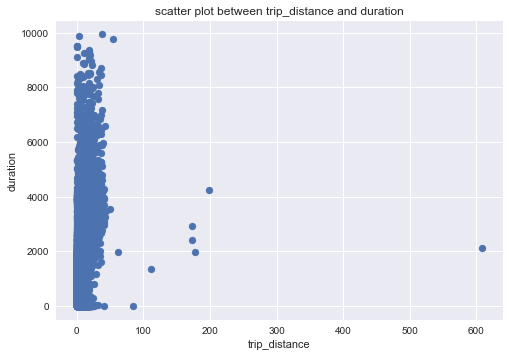

In [97]:
plt.scatter(df['trip_distance'],df['duration'])
plt.xlabel('trip_distance')
plt.ylabel('duration')
plt.title('scatter plot between trip_distance and duration')

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [111]:

df['day_of_week'] = [datetime.date(x.year, x.month, x.day).isoweekday() for x in df['tpep_pickup_datetime']]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,1
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,3
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,2
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,7
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,4
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,4
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,6
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,7


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [112]:
df['pickup_hour'] = [x.hour for x in df['tpep_pickup_datetime']]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,1,10
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,3,10
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,2,0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,7,16
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,4,7
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,4,1
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,6,10
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,7,15


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

<AxesSubplot:title={'center':'condition of using cars in everyhour for every day'}, xlabel='day_of_week'>

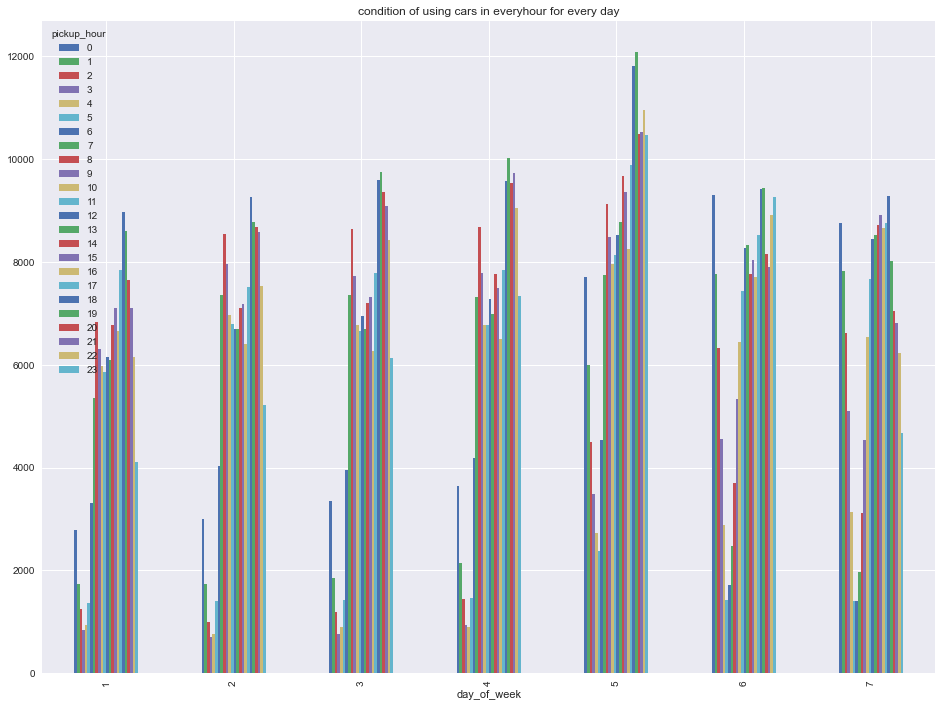

In [130]:
### by ['day_of_week']
df1=df.groupby(['day_of_week','pickup_hour'])
df1.size().unstack().plot(kind='bar',title="condition of using cars in everyhour for every day",figsize=(16,12))

we could find that the uses of cars are largest during Fridays and increase on weekends.
For every day, the peak of uses wwould show up during morning and evenings.

<h2>Create zones</h2>

In [150]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    #Your code goes here
    delta1=(northlimit-southlimit)/zone_factor
    delta2=(eastlimit-westlimit)/zone_factor
    for i in range(zone_factor): ### latitude
        for j in range(zone_factor): ### longitude
            a=[southlimit+i*delta1, westlimit+j*delta2]
            b=[southlimit+i*delta1, westlimit+(j+1)*delta2]
            c=[southlimit+(i+1)*delta1, westlimit+(j+1)*delta2]
            d=[southlimit+(i+1)*delta1, westlimit+j*delta2]
            zone_table.append((str((i+1)*(j+1)-1),[a,b,c,d,a]))

    return zone_table

In [151]:
zone_table=createZoneTable(20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
zone_table[0][1]

[[40.4856, -74.2635],
 [40.4856, -74.237955],
 [40.509299999999996, -74.237955],
 [40.509299999999996, -74.2635],
 [40.4856, -74.2635]]

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [279]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    #Your code goes here
    for item in zone_table:
        f=dict()
        geo=dict()
        geo['coordinates']=[[list(reversed(x)) for x in item[1]]]
        geo['type']='Polygon'
        f['geometry']=geo
        zone=dict()
        zone['zone_id']=item[0]
        f['properties']=zone
        f['type']='Feature'
        zone_data_dict_features.append(f)
        
    return zone_data_dict

In [280]:
createGeoJsonObject(zone_table)

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.237955, 40.4856],
      [-74.237955, 40.509299999999996],
      [-74.2635, 40.509299999999996],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '0'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.237955, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.509299999999996],
      [-74.237955, 40.509299999999996],
      [-74.237955, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '1'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.186865, 40.4856],
      [-74.186865, 40.509299999999996],
      [-74.21240999999999, 40.509299999999996],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '2'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.186865, 40.4856],
      [-74.16131999999999, 40.4856

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [303]:
zone_factor=20
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(40.65,-74.19)</span> the function should return "31"

In [304]:
def get_zone(lat, lon, zone_table): 
    
    zone_factor = int(np.sqrt(int(zone_table[-1][0]) + 1))  
    southlimit = zone_table[0][1][0][0] 
    westlimit = zone_table[0][1][0][1] 
    northlimit = zone_table[-1][1][2][0] 
    eastlimit = zone_table[-1][1][2][1] 
    zone_width = (eastlimit - westlimit) / zone_factor 
    zone_height = (northlimit - southlimit) / zone_factor  

    i = int((lat - southlimit) // zone_height) 
    j = int((lon - westlimit) // zone_width)
    
    return str(i * zone_factor + j)

In [305]:
get_zone(40.65,-74.19,zone_table)

'122'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [306]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [307]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude'],zone_table),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_latitude'],x['dropoff_longitude'],zone_table),axis=1)


In [308]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,0.5,1.85,0.00,0.3,11.15,657.0,1,10,231,230
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,0.5,1.36,0.00,0.3,8.16,365.0,3,10,252,251
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,0.5,2.00,0.00,0.3,12.30,502.0,2,0,209,189
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,0.5,1.30,0.00,0.3,6.60,194.0,7,16,251,252
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,0.5,0.00,0.00,0.3,14.30,1351.0,2,11,231,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,0.5,2.16,0.00,0.3,12.96,743.0,4,7,189,210
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,0.5,0.00,0.00,0.3,6.80,238.0,4,1,251,271
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,0.5,1.65,0.00,0.3,9.95,482.0,6,10,210,190
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,0.5,6.75,5.54,0.3,40.59,1326.0,7,15,255,271


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [309]:
### Percentage of the total rides where the pickup zone is the same as the dropoff zone
percent=df[df['pickup_zone']==df['dropoff_zone']].shape[0]/df.shape[0]
percent

0.2366807822648705

In [310]:
### Zone with the highest pickups
df.groupby(['pickup_zone']).size().sort_values().index[-1]

'231'

In [311]:
### Zone with the highest dropoffs
df.groupby(['dropoff_zone']).size().sort_values().index[-1]

'231'

<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


<AxesSubplot:title={'center':'top5 pickup zones in everyhour for every day'}, xlabel='pickup_hour'>

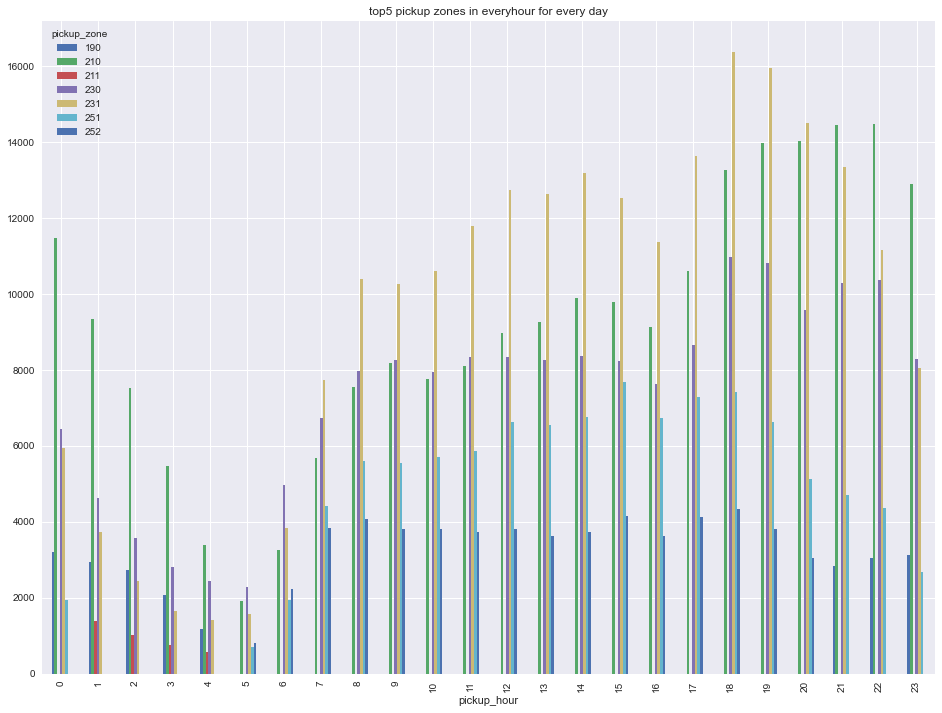

In [312]:
df1=df.groupby(['pickup_hour','pickup_zone']).size()
hours=[]
for i in range(24):
    hours.append(df1.loc[i,:].sort_values(ascending=False).head(5))
res=pd.concat(hours)
res.unstack().plot(kind='bar',title="top5 pickup zones in everyhour for every day",figsize=(16,12))


In [ ]:
COL_NUM = 2
ROW_NUM = 12 
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(6 * COL_NUM, 3 * ROW_NUM))

for i, (pickup_hour, pickup_zone) in enumerate(pickup_hour_zone.items()): 
    ax = axes[int(i / COL_NUM), i % COL_NUM]
    pickup_zone.sort_values(ascending=False)[:5].plot(kind='barh', ax=ax, color='g')
    ax.set_title('pickup hour: ' + str(pickup_hour)) 

plt.tight_layout()

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

<AxesSubplot:title={'center':'top5 pickup zones in a week'}, xlabel='day_of_week'>

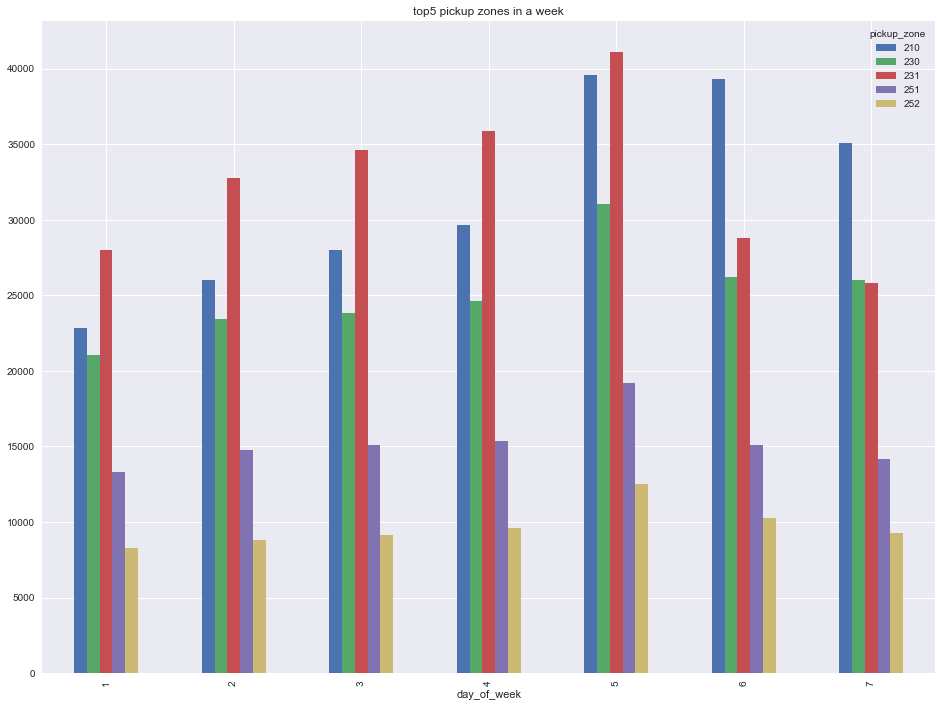

In [313]:
df1=df.groupby(['day_of_week','pickup_zone']).size()
days=[]
for i in range(1,8):
    days.append(df1.loc[i,:].sort_values(ascending=False).head(5))
res=pd.concat(days)
res.unstack().plot(kind='bar',title="top5 pickup zones in a week",figsize=(16,12))



<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



<AxesSubplot:title={'center':'top5 pickup zones on a weekday during 8am and 9am'}, xlabel='day_of_week'>

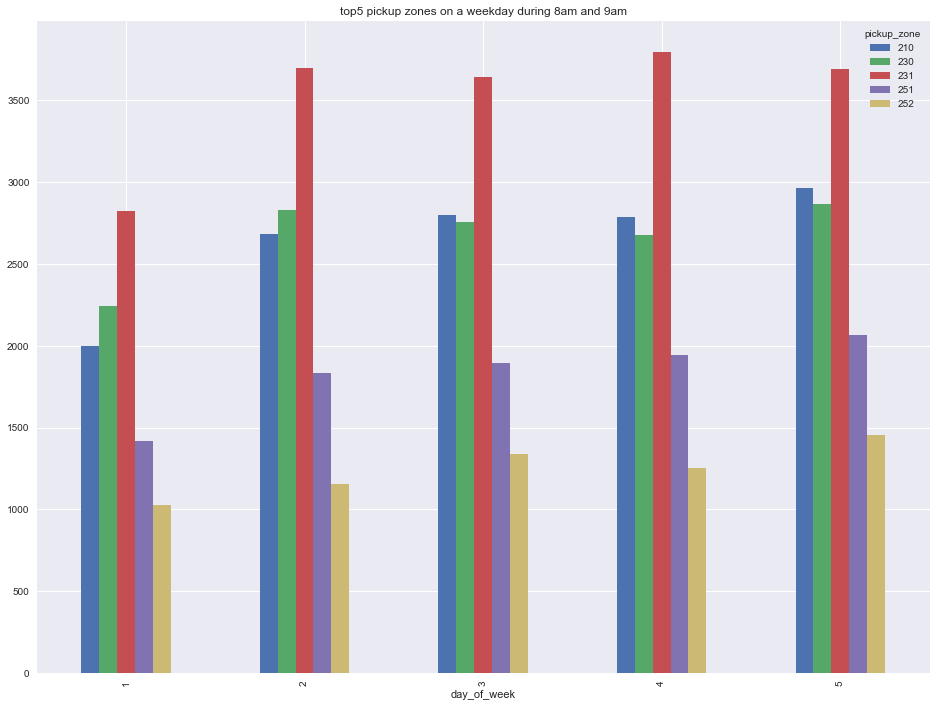

In [314]:
df2=df[(df['pickup_hour']==8) | (df['pickup_hour']==9)]
df3=df2[(df2['day_of_week']!=6) & (df2['day_of_week']!=7)]
df4=df3.groupby(['day_of_week','pickup_zone']).size()
days=[]
for i in range(1,6):
    days.append(df4.loc[i,:].sort_values(ascending=False).head(5))
res=pd.concat(days)
res.unstack().plot(kind='bar',title="top5 pickup zones on a weekday during 8am and 9am",figsize=(16,12))



### normally speaking, the most frequent pickup zone between 8 am and 9 am on a weekday is zone 231. 

<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [315]:
import folium
import json
import geojsonio


In [316]:
df0=df.groupby(['pickup_zone']).size()
count = pd.DataFrame(df0)
count.rename(columns={0:"count"},inplace=True)
count.reset_index(level=0, inplace=True)
count['zone'] = count['pickup_zone']
count

,pickup_zone,count,zone
0,104,1,104
1,106,1,106
2,107,1,107
3,108,5,108
4,109,27,109
...,...,...,...
202,93,2,93
203,94,1,94
204,97,1,97
205,98,4,98


In [317]:
map_dict=createGeoJsonObject(zone_table)
map_dict


{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.237955, 40.4856],
      [-74.237955, 40.509299999999996],
      [-74.2635, 40.509299999999996],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '0'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.237955, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.509299999999996],
      [-74.237955, 40.509299999999996],
      [-74.237955, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '1'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.186865, 40.4856],
      [-74.186865, 40.509299999999996],
      [-74.21240999999999, 40.509299999999996],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '2'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.186865, 40.4856],
      [-74.16131999999999, 40.4856

In [318]:
import folium
#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data=json.dumps(map_dict), data=count,
             columns=[ 'zone','count'],
             key_on='feature.properties.zone_id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of car picks')
folium.LayerControl().add_to(m)

/Users/daizytang/Documents/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [319]:
m

In [288]:
json.dumps(map_dict)

'{"type": "FeatureCollection", "features": [{"geometry": {"coordinates": [[[-74.2635, 40.4856], [-74.237955, 40.4856], [-74.237955, 40.509299999999996], [-74.2635, 40.509299999999996], [-74.2635, 40.4856]]], "type": "Polygon"}, "properties": {"zone_id": "0"}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.237955, 40.4856], [-74.21240999999999, 40.4856], [-74.21240999999999, 40.509299999999996], [-74.237955, 40.509299999999996], [-74.237955, 40.4856]]], "type": "Polygon"}, "properties": {"zone_id": "1"}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.21240999999999, 40.4856], [-74.186865, 40.4856], [-74.186865, 40.509299999999996], [-74.21240999999999, 40.509299999999996], [-74.21240999999999, 40.4856]]], "type": "Polygon"}, "properties": {"zone_id": "2"}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.186865, 40.4856], [-74.16131999999999, 40.4856], [-74.16131999999999, 40.509299999999996], [-74.186865, 40.509299999999996], [-74.186865, 40.4856]]], "type": "P